In [8]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../data/processed/data_final.csv")

In [7]:
y = df["mean_hrv"]

results = []

for col in ["sleep_quality", "sleep_sum", "sleep_efficiency", "deep_rem_score", "stepCount", "sportTime"]:
    X = df[[col]]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_scaled = sm.add_constant(X_scaled)
    model = sm.OLS(y, X_scaled).fit()

    results.append({
        "variable": col,
        "beta": model.params[1],      # standardized coefficient
        "p_value": model.pvalues[1],
        "r_squared": model.rsquared
    })

results_df = pd.DataFrame(results)
results_df


/var/folders/n5/vq6xltkj6nbfjvktp9d79y0h0000gn/T/ipykernel_18467/2518294054.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "beta": model.params[1],      # standardized coefficient
/var/folders/n5/vq6xltkj6nbfjvktp9d79y0h0000gn/T/ipykernel_18467/2518294054.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "p_value": model.pvalues[1],
/var/folders/n5/vq6xltkj6nbfjvktp9d79y0h0000gn/T/ipykernel_18467/2518294054.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a valu

,variable,beta,p_value,r_squared
0,sleep_quality,0.176495,0.475854,0.000718
1,sleep_sum,1.086134,0.000010,0.027201
2,sleep_efficiency,-0.501881,0.042353,0.005808
3,deep_rem_score,0.356945,0.149091,0.002938
4,stepCount,-0.843758,0.000622,0.016415
5,sportTime,-0.449942,0.068846,0.004668


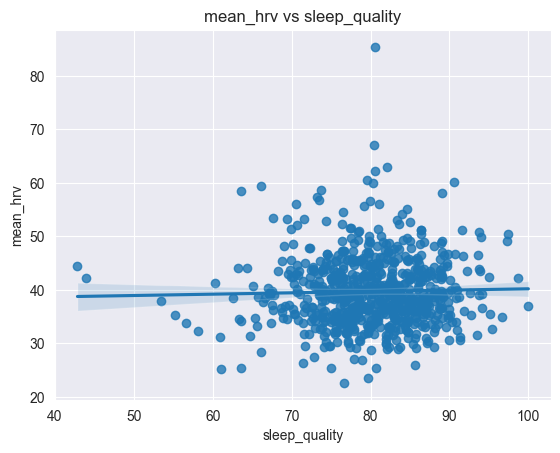

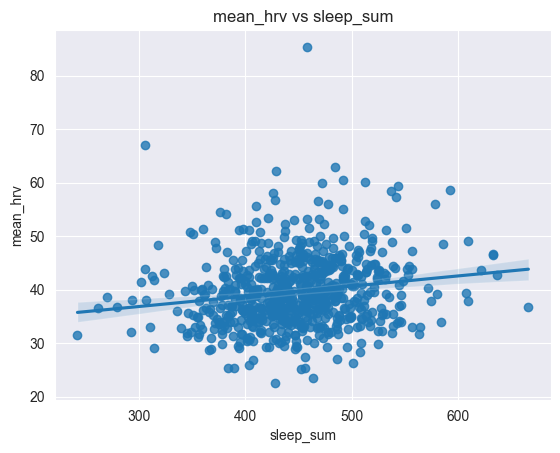

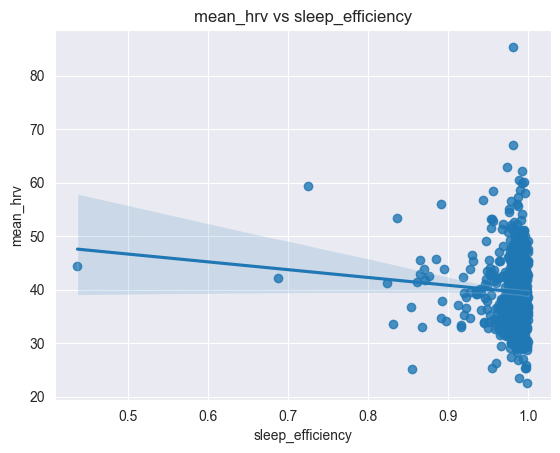

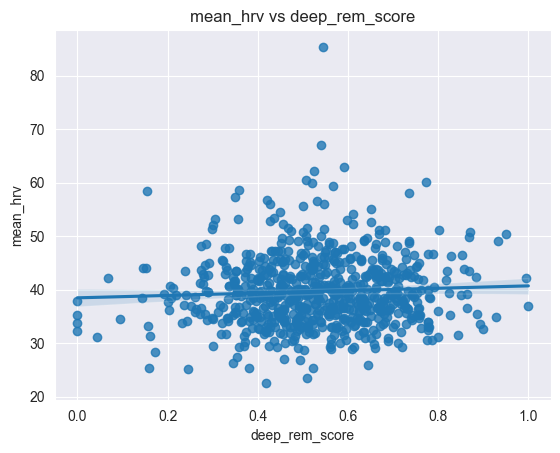

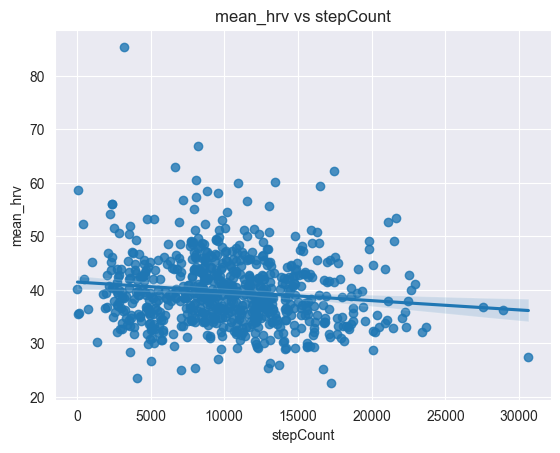

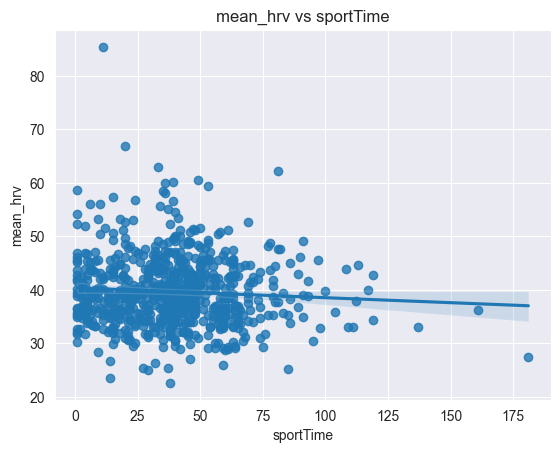

In [10]:
for col in ["sleep_quality", "sleep_sum", "sleep_efficiency", "deep_rem_score", "stepCount", "sportTime"]:
    sns.regplot(x=df[col], y=df["mean_hrv"])
    plt.title(f"mean_hrv vs {col}")
    plt.show()
